# Learning outcomes
1. Geometric transformation (rotation, translation, affine transformation, perspective transformation)
2. Drawing functions
3. Bitwise operator (AND, OR, XOR, NOT)
4. Convolution (CNN, smoothing, sharpening)

## Setup

In [1]:
# !pip install scipy

In [2]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

## Geometric transformation

### Affine transformation

#### Translation

In [3]:
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
tx = 50
ty = 100
M = np.float32([[1, 0, tx], [0, 1, ty]])

# perform transformation
dst = cv.warpAffine(img, M, (w+tx, h+ty))

show_img("translation", dst)

### Rotation

In [3]:
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]

yc, xc = h // 2, w // 2
angle = 90

# get transformation matrix
M = cv.getRotationMatrix2D((xc, yc), angle, 1)

dst = cv.warpAffine(img, M, (w, h))

show_img("rotation", dst)

### Custom affine transformation

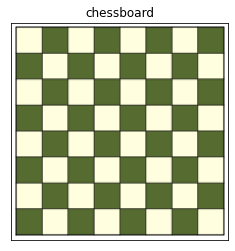

In [5]:
img = cv.imread("images/chessboard.png")

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt_img(img, title="chessboard")

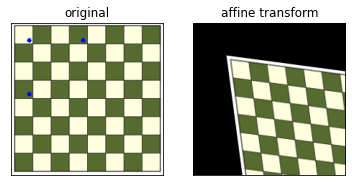

In [6]:
img_copy = img.copy()
h, w = img_copy.shape[:2]

# pairs of points
p0 = np.float32([[25, 25], [100, 25], [25, 100]])
p1 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 3, (0, 0, 255), -1)

# get M
M = cv.getAffineTransform(p0, p1)

# perform transformation
dst = cv.warpAffine(img_copy, M, (w, h))

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
plt.subplot(121), plt_img(img, title="original")
plt.subplot(122), plt_img(dst, title="affine transform")
plt.show()

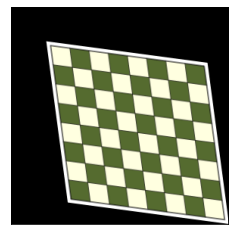

In [7]:
dst = cv.warpAffine(img_copy, M, (w+75, h+75))
plt_img(dst)
plt.show()

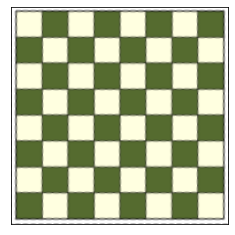

In [8]:
M_inv = cv.getAffineTransform(p1, p0)
img_restored = cv.warpAffine(dst, M_inv, (w, h))

plt_img(img_restored)
plt.show()

## Perspective transform

In [9]:
img = cv.imread("images/name_card_sample.webp")

show_img("name card", img)

In [10]:
p = []

# mouse callback function
def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(119, 109)
(769, 42)
(916, 264)
(69, 387)


In [11]:
from scipy.spatial.distance import euclidean

In [12]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

W = max(w1, w2)
H = max(h1, h2)

p_array = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_array, dst)
warp = cv.warpPerspective(img, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img)
show_img("warp", warp, adjust=True)

## Drawing functions
- Line
- circle
- ellipse
- rectangle
- text

In [15]:
img = cv.imread("images/dog.jfif")
print(img.shape)

(168, 300, 3)


In [14]:
img_copy = img.copy()
cv.line(img_copy, (50, 50), (150, 100), (0, 0, 255), 2, cv.LINE_AA)
show_img("img", img_copy)

### Circle

In [19]:
img_copy = img.copy()
cv.circle(img_copy, (145, 50), 40, (0, 100, 200), 2, cv.LINE_8)
show_img("img", img_copy)

### Ellipse

In [22]:
img_copy = img.copy()
center = (145, 50)
axes = (50, 25)
angle = 0

cv.ellipse(img_copy, center, axes, angle, 0, 360, (100, 0, 50), 2, cv.LINE_4)
show_img("img", img_copy)

### Rectangle

In [23]:
img_copy = img.copy()
cv.rectangle(img_copy, (100, 100), (190, 90), (0, 100, 200), 2, cv.LINE_8)
show_img("img", img_copy)

### Text

In [25]:
img_copy = img.copy()
cv.putText(img_copy, "This dog is adorable", (20, 145), cv.FONT_HERSHEY_SIMPLEX, 0.6, 
            (0, 0, 100), 2)
show_img("img", img_copy)

## Exercise: Drawing functions

In [35]:
# create bulleye
img = np.zeros((400, 400), dtype=np.uint8)

radius = np.arange(20, 200, 15)
yc, xc = img.shape[0] // 2, img.shape[1] // 2

for r in radius:
    cv.circle(img, (xc, yc), r, 255, 2)

# put text
cv.putText(img, "Bulleye", (15, 385), cv.FONT_HERSHEY_SIMPLEX, 0.7, 255)

show_img("img", img)

## Create a simple app

In [45]:
# trackbar
WHITE = (255, 255, 255)
RED = (0, 0, 255)
GREEN = (255, 0, 0)
BLUE = (0, 255, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, BLUE, GREEN, CYAN, MAGENTA, YELLOW, WHITE)

# trackbar function, mousecallback function, while loop
def nothing(x):
    pass

p0 = p1 = (0, 0)
def mouse(event, x, y, flags, params):
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x, y)
        
        d = cv.getTrackbarPos("thickness", "window")
        if d == 0:
            d = -1
        i = cv.getTrackbarPos("color", "window")
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow("window", img)

img = np.zeros((400, 400, 3), np.uint8)
cv.namedWindow("window")
cv.createTrackbar("color", "window", 0, 6, nothing)
cv.createTrackbar("thickness", "window", 0, 10, nothing)
cv.setMouseCallback("window", mouse)

while (1):
    cv.imshow("window", img)
    k = cv.waitKey(1)
    if k == 27:
        break
        
    if k == ord("c"):
        img[:] = 0
        
    
cv.destroyAllWindows()

## Bitwise operations
- AND, OR, XOR, and NOT

In [47]:
rect = np.zeros((400, 400), np.uint8)
rect[30:370, 30:370] = 255

circle = np.zeros((400, 400), np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rectangle", rect)
show_img("circle", circle)

In [48]:
# AND
res = cv.bitwise_and(rect, circle)
show_img("AND", res)

In [51]:
res = cv.bitwise_or(rect, circle)
show_img("OR", res)

In [50]:
res = cv.bitwise_xor(rect, circle)
show_img("XOR", res)

### The bitwise operation are especially important for masking

In [71]:
img = cv.imread("images/dog.jfif")
h, w = img.shape[:2]

mask = np.zeros((h, w), dtype=np.uint8)
cv.circle(mask, (145, 50), 40, 255, -1)

face = cv.bitwise_and(img, img, mask=mask)

show_img("face", face)

### Identity kernel

In [53]:
kernel = np.zeros((3, 3))
kernel[1, 1] = 1

img = cv.imread("images/opencv_logo.png")
dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("identity", dst)

### Use cases
- Sharpening
- Smoothing (a way to denoise)
- cool effect

In [9]:
# sharpening
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/dog.jfif")
dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("sharpening", dst)

In [16]:
# blurring
kernel = np.ones((3, 3)) / 9

dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("blur", dst)

In [62]:
sharp = cv.addWeighted(img, 1.5, dst, -0.5, 0)

show_img("sharp", sharp)

## OpenCV image blurring functions
- cv.blur: smoothing (average filter)
- cv.GaussianBlur: Gaussian smoothing (Blur effect more satisfactory)
- cv.medianBlur: median filter (Good for removing salt and pepper noise)
- cv.bilateralFilter: edge-preserving filter

Types of noise:
- random noise
- Gaussian noise
- salt and peper noise.

## Weekly Activity

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

### Activity 1

In [16]:
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
xc, yc = w // 2, h // 2

M = cv.getRotationMatrix2D((xc, yc), 45, 1)

abs_cos = abs(M[0,0]) 
abs_sin = abs(M[0,1])

# get new h and w according to rotation
h = int(h * abs_sin + w * abs_cos)
w = int(h * abs_cos + w * abs_sin)
    
M[0, 2] += w/2 - xc
M[1, 2] += h/2 - yc
    
dst = cv.warpAffine(img, M, (w, h))

show_img("rotated 45 degree", dst)

### Activity 2

In [5]:
flower = cv.imread("images/flower.jfif")
bee = cv.imread("images/native-bee.png")

# get ROI from original image = dsize of to-be-added image
h, w = flower.shape[:2]
roi = bee[:h, :w]

gray_flower = cv.cvtColor(flower, cv.COLOR_BGR2GRAY)

ret, mask = cv.threshold(gray_flower, 70, 255, cv.THRESH_BINARY)

# black out object in ROI
mask_inv = cv.bitwise_not(mask)
bee_fg = cv.bitwise_and(roi, roi, mask=mask_inv)

# get the object
flower_bg = cv.bitwise_and(flower, flower, mask=mask)

dst = cv.add(flower_bg, bee_fg)
bee[:h, :w] = dst

show_img("bee + flower", bee)

### Activity 3

In [12]:
img = cv.imread("images/native-bee.png")

by3_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

by5_kernel = np.ones((5, 5)) * -1
by5_kernel[2, 2] = 25

by3_img = cv.filter2D(img, -1, by3_kernel)
by5_img = cv.filter2D(img, -1, by5_kernel)

# 5x5 undergoes higher sharpening and introduced more noise than 3x3 kernel
cv.imshow("3x3 kernel", by3_img)
show_img("5x5 kernel", by5_img)

### Activity 4

In [17]:
img = cv.imread("images/noise_lena.jpg")

In [38]:
ksize = (5, 5)

# blur (average filter)
img_blur = cv.blur(img, ksize)

# Gaussian filter
img_gaussian = cv.GaussianBlur(img, ksize, 0)

# median filter
img_median = cv.medianBlur(img, ksize[0])

# ----------------------------------------------------- #
# The original images suffers from salt and pepper noise
cv.imshow("original", img)

# average filter: able to reduce salt and pepper. However, blurs the image such that it cannot be seen clearly
cv.imshow("average filter", img_blur)

# gaussian filter: able to reduce salt and pepper. Image is clearer than average filter
cv.imshow("Gaussian filter", img_gaussian)

# median filter: removed salt and pepper noise with small blurring in image
show_img("median filter", img_median)